# Linear Regression

### General idea:

Given a set of data points $\{x_1, \cdots, x_m\}$ associated to a set of outcomes $\{y_1, \cdots, y_m\}$ we want to build a model to classify $y$ from $x$.

### Hypothesis:

For a given input data $x_i$ the model we choose, noted $h_{\theta}$, prediction output is $h_{\theta}(x_i)$.

### Loss Function:

The loss functions is a function $L : (z,y) \in \mathbf{R} \times Y → L(z,y) \in \mathbf{R} $ that takes as inputs the predicted value $z$ corresponding to the real data value $y$ and outputs how different they are. For a logistic classification the common loss functions is the Logistic Loss:

$$
\log(1+\exp(-yz)).
$$

### Cost Function:

The cost function is often used to assess the performance of a model, it is defined as follows:

$$
J(\theta) = \sum_{i=1}^{m}L(h_{\theta}(x_i), y_i)
$$

### Model:


**Sigmoid Function** - The sigmoid function $g$, also known as the logistic function, is defined as follows:

$$
\forall z \in \mathbf{R}, g(z) = \frac{1}{1+e^{-z}} \in ]0,1[.
$$

**Logistic Regression ** -We assume here that $y|x ; \sim Bernoulli(\phi)$. We have the following form:

$$
\phi = p(y=1 | x: \theta) = \frac{1}{1+ \exp(-\theta^Tx)} = g(\theta^T x)
$$

Ref: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning

# EXAMPLES

## Classification - Social Network

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import seaborn as sns


#get data
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fitting
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#training

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#prediction
y_pred = classifier.predict(X_test)

# evaluating model
cm = confusion_matrix(y_test, y_pred)

## Confusion Matrix
 A confusion matrix is a table used to evaluate the performance of a classification algorithm. It summarizes the results of a classification problem, showing the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. In a context of a binary classification, the confusion matrix is used to have a more complete picture when assessing the performance of a model. It is defined as follows:

- **True Positive (TP):** The number of instances correctly predicted as positive. In binary classification, it means the model correctly identified the positive class.

- **True Negative (TN):** The number of instances correctly predicted as negative. In binary classification, it means the model correctly identified the negative class.

- **False Positive (FP):** Also known as Type I error, it is the number of instances incorrectly predicted as positive when they are actually negative.

- **False Negative (FN):** Also known as Type II error, it is the number of instances incorrectly predicted as negative when they are actually positive.

### Metrics Derived from the Confusion Matrix:

From the confusion matrix, several metrics can be calculated to evaluate the performance of a classification model:

1. **Accuracy:** `(TP + TN) / (TP + TN + FP + FN)` - Overall correctness of the model.

2. **Precision:** `TP / (TP + FP)` - The ability of the classifier not to label as positive a sample that is negative.

3. **Recall (Sensitivity or True Positive Rate):** `TP / (TP + FN)` - The ability of the classifier to find all the positive samples.

4. **Specificity (True Negative Rate):** `TN / (TN + FP)` - The ability of the classifier to find all the negative samples.

5. **F1 Score:** `2 * (Precision * Recall) / (Precision + Recall)` - The harmonic mean of precision and recall.



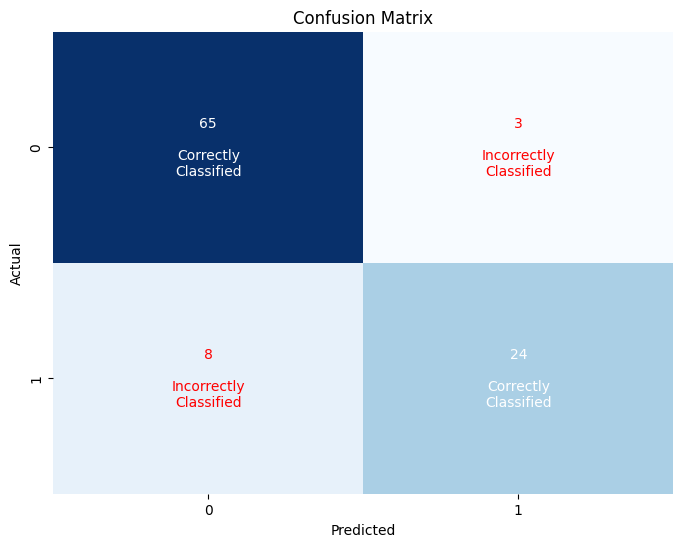

In [18]:

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", cbar=False)

# Adding labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adding TP, TN, FP, FN labels
for i in range(len(cm)):
    for j in range(len(cm)):
        text = f"{cm[i, j]}"
        if i == j:
            text += f"\n\nCorrectly\nClassified"
        else:
            text += f"\n\nIncorrectly\nClassified"
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='red' if i != j else 'white')

plt.show()

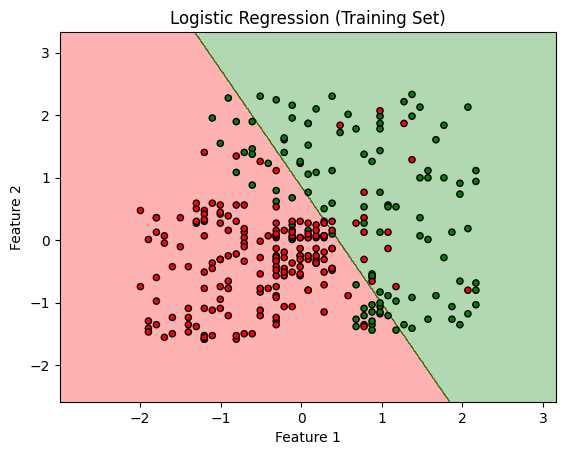

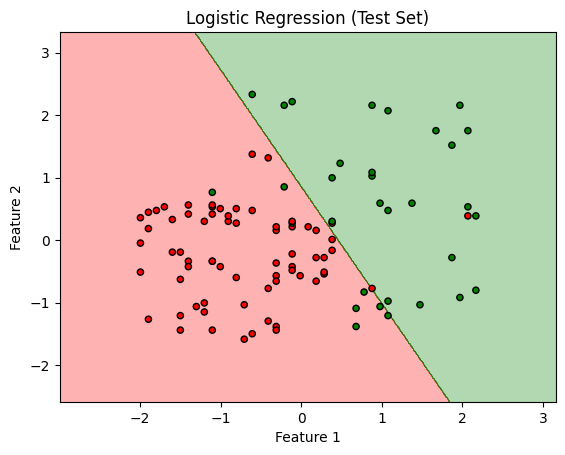

In [9]:

# Function to plot decision boundary
def plot_decision_boundary(X, y, classifier, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=ListedColormap(('red', 'green')), alpha=0.3)

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('red', 'green')), edgecolors='k', s=20)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundary on the training set
plot_decision_boundary(X_train, y_train, classifier, 'Logistic Regression (Training Set)')

# Plot decision boundary on the test set
plot_decision_boundary(X_test, y_test, classifier, 'Logistic Regression (Test Set)')
